In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision', 2) # show only two decimal digits
sns.set_context('poster')

from PIL import Image

import re

import numpy as np
import matplotlib.pylab as pl
import matplotlib.ticker as tick

In [5]:
df=pd.read_csv('csv/ks_2018.csv',index_col='ID')
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:

# print(df.state.value_counts())
shape_map = {"failed":"x", "successful":"v", "canceled":"x", "undefined":"x", "live":"x", "suspended":"x"}
color_map = {"failed":"red", "successful":"blue", "canceled":"red", "undefined":"red", "live":"red", "suspended":"red"}

df['shapes']= df.state.map(shape_map)
df['color']= df.state.map(color_map)

# print(df.head())
        

converted_deadline = pd.to_datetime(df.deadline)
converted_launched_date=pd.to_datetime(df.launched)
df['days_between']=converted_deadline-converted_launched_date
df['days_between']=df['days_between'].apply(lambda x : x.days)




29       169171
59        33623
44        17749
30        13261
34        10099
          ...  
14732         1
14760         1
16738         1
14866         1
14834         1
Name: days_between, Length: 99, dtype: int64
<class 'list'>


(0.0, 100.0)

(0.0, 5000000.0)

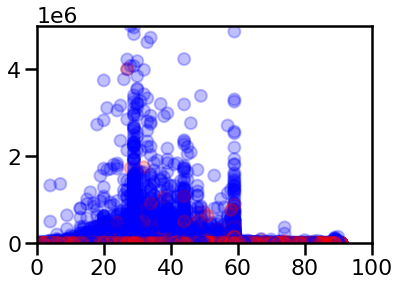

In [7]:
print(df.days_between.value_counts())
# print(df.shapes.value_counts())
# print(df.color.value_counts())
shape_vector=list(df.state.map(shape_map))
color_vector=list(df.state.map(color_map))
# print(shape_vector)
print(type(shape_vector))

plt.scatter(x=df.days_between,y=df.pledged , c=color_vector,alpha=0.25)
plt.xlim(0,100)
plt.ylim(0,5000000)

([<matplotlib.patches.Wedge at 0x7f996dc53520>,
 [Text(-0.5537486019346191, 0.9504538315223181, 'Film & Video'),
  Text(-1.096030719428618, 0.09336306587075027, 'Music'),
  Text(-0.8576889577639901, -0.6887449830886034, 'Publishing'),
  Text(-0.2945696937282511, -1.0598248419134384, 'Games'),
  Text(0.3160325122256739, -1.0536239610109146, 'Technology'),
  Text(0.7975488659669824, -0.757572311000594, 'Design'),
  Text(1.0581747890342523, -0.30044319904487043, 'Art'),
  Text(1.0857670178699412, 0.17638022254724234, 'Food'),
  Text(0.9352101661929509, 0.5791217014146104, 'Fashion'),
  Text(0.4420252882925592, 1.0072803207200467, 'Varia')],
 [Text(-0.30204469196433764, 0.5184293626485371, '16.8%'),
  Text(-0.5978349378701553, 0.05092530865677287, '13.7%'),
  Text(-0.46783034059854, -0.3756790816846927, '10.5%'),
  Text(-0.16067437839722787, -0.57808627740733, '9.3%'),
  Text(0.17238137030491305, -0.5747039787332261, '8.6%'),
  Text(0.43502665416380853, -0.41322126054577846, '7.9%'),
  Tex

(-1.1091564384677888,
 1.1025361664197117,
 -1.101936406406879,
 1.1000922132209636)

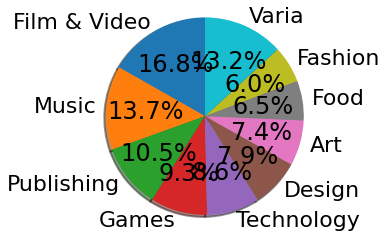

In [8]:
number_of_records=df.shape[0]
vc=df.main_category.value_counts()
vc_in_percentages=vc/number_of_records

#the sections that are smaller than 
smaller_section= vc_in_percentages[vc_in_percentages<0.03]
vc_in_percentages= vc_in_percentages[vc_in_percentages>=0.03]

vc_in_percentages.items()

keywords,percentages=zip(*vc_in_percentages.items())
keywords=list(keywords)
percentages=list(percentages)
keywords.append('Varia')
percentages.append(smaller_section.sum())
        

fig1, ax1 = plt.subplots()
ax1.pie(percentages, labels=keywords, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [9]:
df = df[['name', 'category', 'main_category', 'deadline', 
         'launched', 'state', 'backers', 'country', 'usd pledged', 'usd_goal_real']]
# keep only columns needed for analysis

In [10]:
colors = [ '#BBB193','#88CED7', '#C1D8BF', '#E9E2AB', '#F77C11', 
          '#1C6B89', '#3A405A', '#AEC5EB', '#F9DEC9','#E9AFA3', 
          '#685044', '#9D652A', '#E8EDE4', '#3BAF8D','#28536B', 
          '#C2948A', '#7EA8BE', '#F6F0ED']

In [11]:
# convert y-tick numbers into Ks instead of 1000s
def y_fmt(tick_val, pos): 
    if tick_val >= 1000:
        val = tick_val/1000
        return '{0:.0f}k'.format(val)
    else:
        return tick_val

In [12]:
# convert x-tick numbers into Ks instead of 1000s
def x_fmt(tick_val, pos): 
    if tick_val >= 1000:
        val = tick_val/1000
        return '{0:.0f}k'.format(val)
    else:
        return tick_val

In [13]:
# show percentage > 10%
def my_autopct_ten(pct):
    if pct > 10:
        return ('%.2f' % pct + '%')
    else:
        return ''

In [14]:
# dont show percentage
# show percentage > 100%
def my_autopct_noshow(pct):
    if pct > 100:
        return ('%.2f' % pct + '%')
    else:
        return ''

In [15]:
df.groupby('main_category').size().sort_values()

main_category
Dance            3768
Journalism       4755
Crafts           8809
Photography     10779
Comics          10819
Theater         10913
Fashion         22816
Food            24602
Art             28153
Design          30070
Technology      32569
Games           35231
Publishing      39874
Music           51918
Film & Video    63585
dtype: int64

<Figure size 1152x720 with 0 Axes>

<AxesSubplot:ylabel='main_category'>

Text(0.5, 1.03, 'Overall Category-wise Distribution')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Dance'),
  Text(0, 1, 'Journalism'),
  Text(0, 2, 'Crafts'),
  Text(0, 3, 'Photography'),
  Text(0, 4, 'Comics'),
  Text(0, 5, 'Theater'),
  Text(0, 6, 'Fashion'),
  Text(0, 7, 'Food'),
  Text(0, 8, 'Art'),
  Text(0, 9, 'Design'),
  Text(0, 10, 'Technology'),
  Text(0, 11, 'Games'),
  Text(0, 12, 'Publishing'),
  Text(0, 13, 'Music'),
  Text(0, 14, 'Film & Video')])

Text(0.5, 0, 'Count of Projects')

Text(0, 0.5, 'Category')

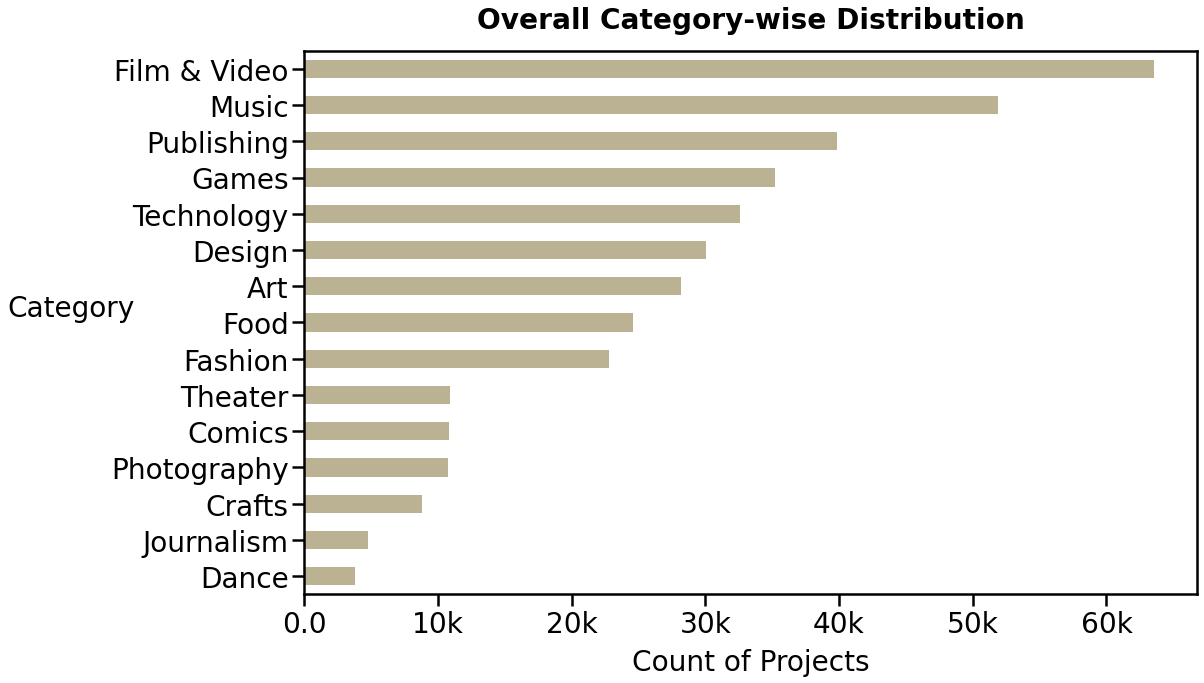

In [16]:
with sns.color_palette(colors):
    plt.figure(figsize=(16, 10))
    df.groupby('main_category').size().sort_values(ascending = True).plot.barh()
    plt.title('Overall Category-wise Distribution', y=1.03, fontsize = 28, fontweight='bold')
    plt.xticks(rotation=0, fontsize=28)
    plt.yticks(fontsize=28)
    plt.xlabel('Count of Projects', labelpad=10, fontsize=28)
    plt.ylabel('Category',rotation=0, labelpad=40, fontsize=28)
    
    ax = plt.gca()
    ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt));

Text(0, 0.5, '')

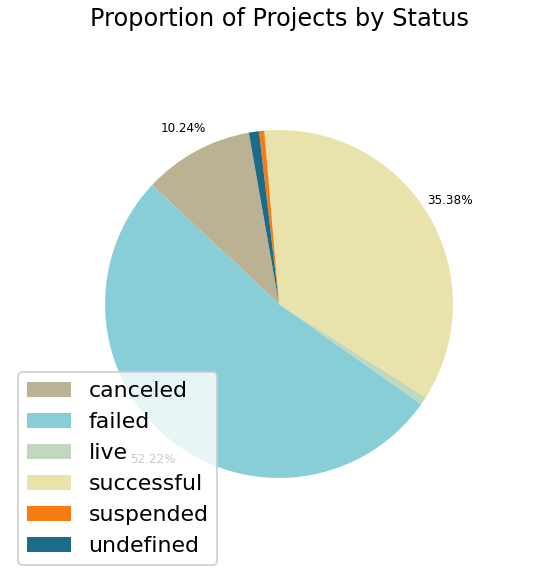

In [17]:
with sns.color_palette(colors):
    ax=df.groupby('state').size().plot(kind='pie', labels=None,
            legend=True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
            fontsize=12, startangle=100, title='Proportion of Projects by Status')
    ax.set_ylabel('');